In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

In [4]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [5]:
df['society'].nunique()

2688

In [6]:
df['availability'].nunique()

81

In [7]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

## Feature Extraction 

In [8]:
df1 = df.drop(['availability','society'],axis=1)
df1.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00


## Data Cleaning 

In [9]:
df1.isna().sum()


area_type       0
location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [10]:
df1['balcony'].fillna(int(df1['balcony'].median()), inplace=True)

In [11]:
df1.dropna(inplace=True)

In [12]:
df1.isna().sum()

area_type     0
location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [13]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [14]:
df1['BHK'] = df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [15]:
df1.drop('size',axis=1,inplace=True)
df1.head()

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200,2.0,1.0,51.00,2


In [16]:
df1.BHK.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [17]:
df1[df1['BHK']>20]

,area_type,location,total_sqft,bath,balcony,price,BHK
1718,Super built-up Area,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Plot Area,Munnekollal,2400,40.0,0.0,660.0,43


In [18]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def check_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
df1[~df1['total_sqft'].apply(check_float)].head(20)



,area_type,location,total_sqft,bath,balcony,price,BHK
30,Super built-up Area,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Super built-up Area,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,Super built-up Area,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Super built-up Area,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,Super built-up Area,KR Puram,1015 - 1540,2.0,0.0,56.800,2
410,Super built-up Area,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Super built-up Area,Hennur Road,1195 - 1440,2.0,0.0,63.770,2
648,Built-up Area,Arekere,4125Perch,9.0,2.0,265.000,9
661,Super built-up Area,Yelahanka,1120 - 1145,2.0,0.0,48.130,2
672,Built-up Area,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4


In [21]:
def range_to_num(x):
    nums = x.split('-')
    if len(nums) == 2:
        return(float(nums[0]) + float(nums[1]))/2
    try:
        return float(x)
    except:
        return None

In [22]:
df2 = df1.copy()

In [23]:
df2['total_sqft'] = df2['total_sqft'].apply(range_to_num)


In [24]:
df2.head(5)

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2


In [25]:
df2['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [26]:
df2.isna().sum()

area_type      0
location       0
total_sqft    46
bath           0
balcony        0
price          0
BHK            0
dtype: int64

In [27]:
df2.shape

(13246, 7)

## Dimensionality Reduction 

In [28]:
df2.location = df2.location.apply(lambda x: x.strip())
location_stats = df.groupby('location')['location'].count().sort_values(ascending=False)
location_stats

location
Whitefield             540
Sarjapur  Road         399
Electronic City        302
Kanakpura Road         273
Thanisandra            234
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1305, dtype: int64

In [29]:
len(location_stats[location_stats<=10])

1064

In [30]:
location_stats_less_than_10 = location_stats[location_stats<=10]

In [31]:
df2['location'].nunique()

1293

In [32]:
df2['location'] = df2['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x )

In [33]:
df2['location'].nunique()

271

In [34]:
df2.head(60)

,area_type,location,total_sqft,bath,balcony,price,BHK
0,Super built-up Area,Electronic City Phase II,1056.00,2.0,1.0,39.07,2
1,Plot Area,Chikka Tirupathi,2600.00,5.0,3.0,120.00,4
2,Built-up Area,Uttarahalli,1440.00,2.0,3.0,62.00,3
3,Super built-up Area,Lingadheeranahalli,1521.00,3.0,1.0,95.00,3
4,Super built-up Area,Kothanur,1200.00,2.0,1.0,51.00,2
5,Super built-up Area,Whitefield,1170.00,2.0,1.0,38.00,2
6,Super built-up Area,Old Airport Road,2732.00,4.0,2.0,204.00,4
7,Super built-up Area,Rajaji Nagar,3300.00,4.0,2.0,600.00,4
8,Super built-up Area,Marathahalli,1310.00,3.0,1.0,63.25,3
9,Plot Area,other,1020.00,6.0,2.0,370.00,6


In [35]:
df3 = df2.copy()
df3['price_per_sqft'] = df3['price']*100000/df3['total_sqft']
df3.head(10)

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Plot Area,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Built-up Area,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Super built-up Area,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Super built-up Area,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Super built-up Area,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,Super built-up Area,Old Airport Road,2732.0,4.0,2.0,204.00,4,7467.057101
7,Super built-up Area,Rajaji Nagar,3300.0,4.0,2.0,600.00,4,18181.818182
8,Super built-up Area,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
9,Plot Area,other,1020.0,6.0,2.0,370.00,6,36274.509804


In [36]:
df3['location'] = df3['location'].str.upper()

In [37]:
df3['location'].nunique()

268

## Outlier Detection

As per the domain knowledge, there are no house with less than 300sqft of 1 bedroom. So we will keep minimum thresshold as 300sqft/bedroom

In [38]:
df3[df3['total_sqft']/df3['BHK']<300]

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
9,Plot Area,OTHER,1020.0,6.0,2.0,370.0,6,36274.509804
45,Plot Area,HSR LAYOUT,600.0,9.0,2.0,200.0,8,33333.333333
58,Plot Area,MURUGESHPALYA,1407.0,4.0,1.0,150.0,6,10660.980810
68,Plot Area,OTHER,1350.0,7.0,0.0,85.0,8,6296.296296
70,Plot Area,OTHER,500.0,3.0,2.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...,...
13277,Plot Area,OTHER,1400.0,7.0,2.0,218.0,7,15571.428571
13279,Plot Area,OTHER,1200.0,5.0,2.0,130.0,6,10833.333333
13281,Plot Area,MARGONDANAHALLI,1375.0,5.0,1.0,125.0,5,9090.909091
13303,Plot Area,VIDYARANYAPURA,774.0,5.0,3.0,70.0,5,9043.927649


In [39]:
df3.shape

(13246, 8)

In [40]:
df4 = df3[~(df3['total_sqft']/df3['BHK']<300)]

In [41]:
df4.shape

(12502, 8)

In [42]:
df4.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [43]:
def remove_pps_outliers(df):
    df_result = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_result = pd.concat([df_result, reduced_df], ignore_index=True)
    return df_result

df5 = remove_pps_outliers(df4)
df5.shape

(10212, 8)

In [44]:
df5.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,1ST BLOCK JAYANAGAR,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,1ST BLOCK JAYANAGAR,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,1ST BLOCK JAYANAGAR,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,1ST BLOCK JAYANAGAR,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,1ST BLOCK JAYANAGAR,1235.0,2.0,2.0,148.0,2,11983.805668


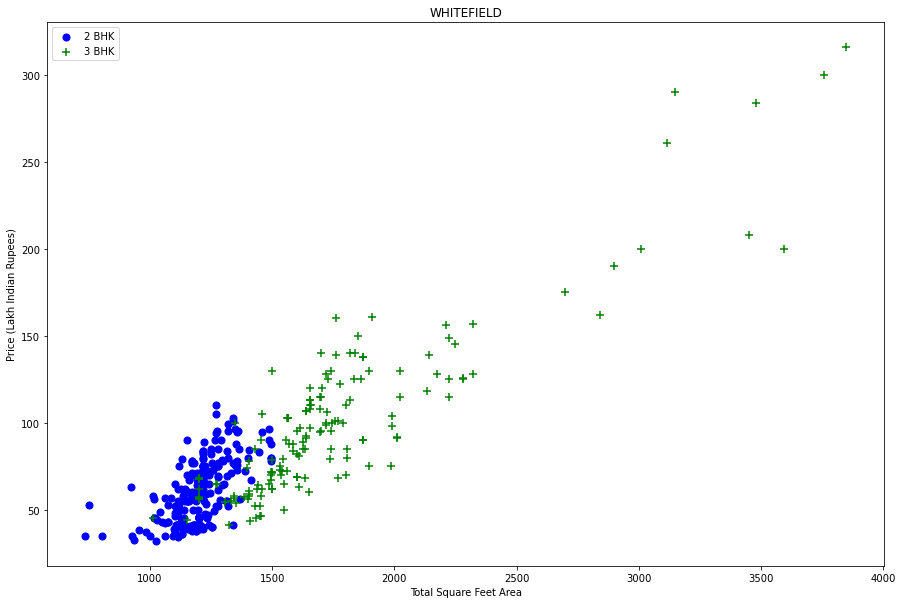

In [45]:
import matplotlib
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]
    bhk3 = df[(df.location==location) & (df.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['total_sqft'], bhk2['price'], color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price'], marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df5,"WHITEFIELD")

Removing those outliers whose price 2bhk price per sqft is less then mean price of 1bhk per sqft

In [46]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df6 = remove_bhk_outliers(df5)
# df8 = df7.copy()
df6.shape

(7316, 8)

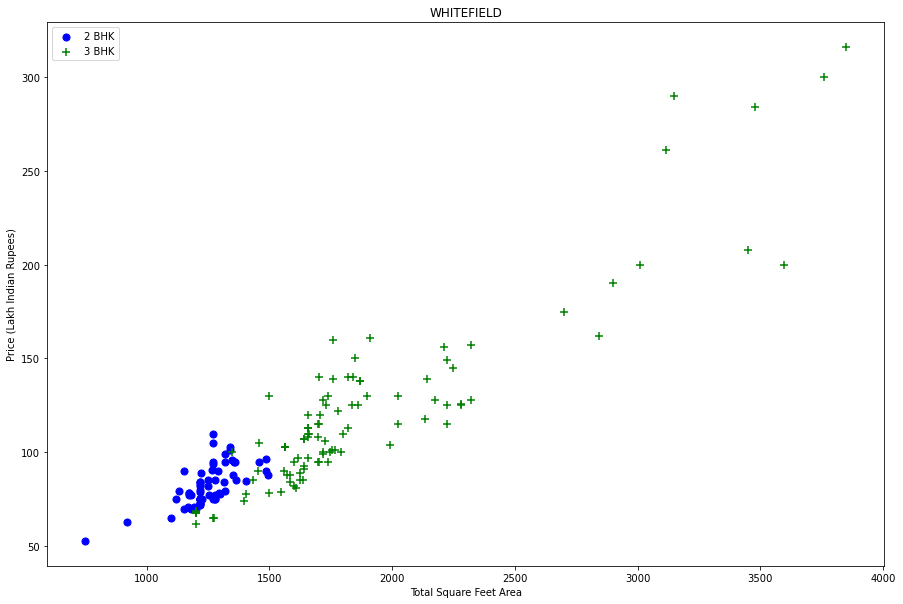

In [47]:
plot_scatter_chart(df6,"WHITEFIELD")

Text(0, 0.5, 'count')

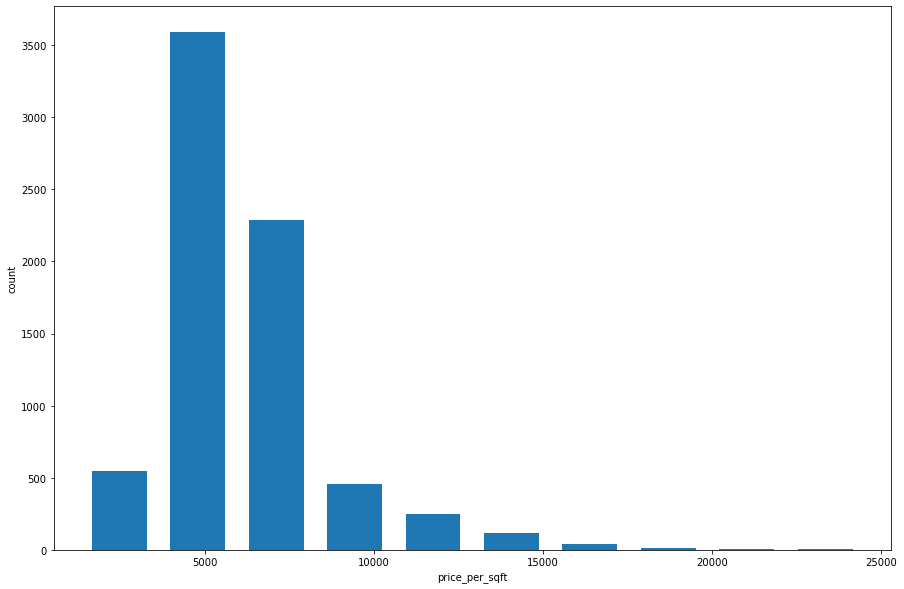

In [48]:
matplotlib.rcParams['figure.figsize'] = (15,10)
plt.hist(df6.price_per_sqft, rwidth=0.7)
plt.xlabel('price_per_sqft')
plt.ylabel('count')

In [49]:
df6.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'count')

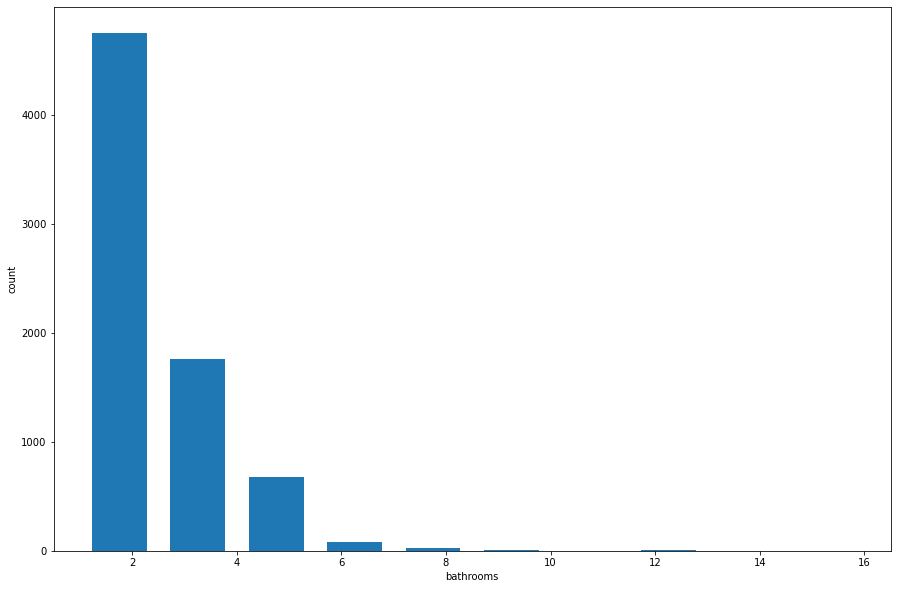

In [50]:
matplotlib.rcParams['figure.figsize'] = (15,10)
plt.hist(df6.bath, rwidth=0.7)
plt.xlabel('bathrooms')
plt.ylabel('count')

Removing outliers of bathrooms; removing  which have number more than no of bedrooms+2

In [51]:
df6[df6.bath>df6.BHK+2]

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
1599,Built-up Area,CHIKKABANAVAR,2460.0,7.0,2.0,80.0,4,3252.032520
5220,Built-up Area,NAGASANDRA,7000.0,8.0,2.0,450.0,4,6428.571429
5847,Super built-up Area,OTHER,11338.0,9.0,1.0,1000.0,6,8819.897689
8979,Super built-up Area,THANISANDRA,1806.0,6.0,2.0,116.0,3,6423.034330


In [52]:
df7 = df6[df6.bath<df6.BHK+2]
df7.head()

,area_type,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Super built-up Area,1ST BLOCK JAYANAGAR,2850.0,4.0,1.0,428.0,4,15017.543860
1,Super built-up Area,1ST BLOCK JAYANAGAR,1630.0,3.0,2.0,194.0,3,11901.840491
2,Super built-up Area,1ST BLOCK JAYANAGAR,1875.0,2.0,3.0,235.0,3,12533.333333
3,Built-up Area,1ST BLOCK JAYANAGAR,1200.0,2.0,0.0,130.0,3,10833.333333
4,Super built-up Area,1ST BLOCK JAYANAGAR,1235.0,2.0,2.0,148.0,2,11983.805668


Text(0, 0.5, 'count')

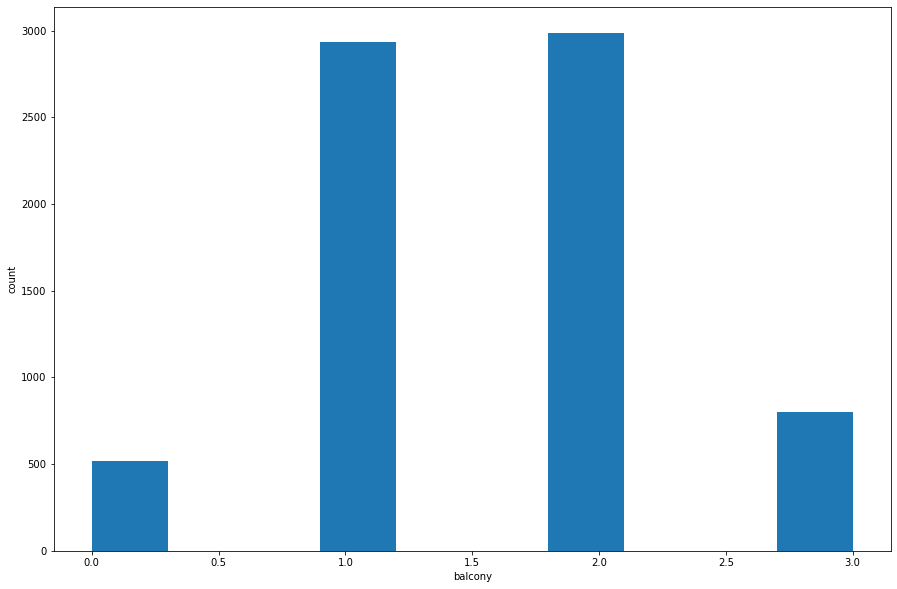

In [53]:
plt.hist(df7.balcony)
plt.xlabel('balcony')
plt.ylabel('count')

In [54]:
df7.drop('price_per_sqft',axis=1,inplace=True)

C:\Users\gandh\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [55]:
df7.drop('area_type',axis=1,inplace=True)

In [56]:
df7.head()

,location,total_sqft,bath,balcony,price,BHK
0,1ST BLOCK JAYANAGAR,2850.0,4.0,1.0,428.0,4
1,1ST BLOCK JAYANAGAR,1630.0,3.0,2.0,194.0,3
2,1ST BLOCK JAYANAGAR,1875.0,2.0,3.0,235.0,3
3,1ST BLOCK JAYANAGAR,1200.0,2.0,0.0,130.0,3
4,1ST BLOCK JAYANAGAR,1235.0,2.0,2.0,148.0,2


## Converting labels into numeric data

In [57]:
dummies = pd.get_dummies(df7['location'])
dummies.head()

,1ST BLOCK JAYANAGAR,1ST PHASE JP NAGAR,2ND PHASE JUDICIAL LAYOUT,2ND STAGE NAGARBHAVI,5TH BLOCK HBR LAYOUT,5TH PHASE JP NAGAR,6TH PHASE JP NAGAR,7TH PHASE JP NAGAR,8TH PHASE JP NAGAR,9TH PHASE JP NAGAR,...,VISHVESHWARYA LAYOUT,VISHWAPRIYA LAYOUT,VITTASANDRA,WHITEFIELD,"WHITEFIELD,",YELACHENAHALLI,YELAHANKA,YELAHANKA NEW TOWN,YELENAHALLI,YESHWANTHPUR
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df8 = pd.concat([df7,dummies.drop('WHITEFIELD,', axis=1)],axis=1)
df8.drop('VIJAYANAGAR',axis=1,inplace=True)
df8.head()

,location,total_sqft,bath,balcony,price,BHK,1ST BLOCK JAYANAGAR,1ST PHASE JP NAGAR,2ND PHASE JUDICIAL LAYOUT,2ND STAGE NAGARBHAVI,...,VIDYARANYAPURA,VISHVESHWARYA LAYOUT,VISHWAPRIYA LAYOUT,VITTASANDRA,WHITEFIELD,YELACHENAHALLI,YELAHANKA,YELAHANKA NEW TOWN,YELENAHALLI,YESHWANTHPUR
0,1ST BLOCK JAYANAGAR,2850.0,4.0,1.0,428.0,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1ST BLOCK JAYANAGAR,1630.0,3.0,2.0,194.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1ST BLOCK JAYANAGAR,1875.0,2.0,3.0,235.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1ST BLOCK JAYANAGAR,1200.0,2.0,0.0,130.0,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1ST BLOCK JAYANAGAR,1235.0,2.0,2.0,148.0,2,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df8.drop('location',axis=1,inplace=True)

In [60]:
df8.drop('balcony',axis=1,inplace=True)

In [61]:
df8.head()

,total_sqft,bath,price,BHK,1ST BLOCK JAYANAGAR,1ST PHASE JP NAGAR,2ND PHASE JUDICIAL LAYOUT,2ND STAGE NAGARBHAVI,5TH BLOCK HBR LAYOUT,5TH PHASE JP NAGAR,...,VIDYARANYAPURA,VISHVESHWARYA LAYOUT,VISHWAPRIYA LAYOUT,VITTASANDRA,WHITEFIELD,YELACHENAHALLI,YELAHANKA,YELAHANKA NEW TOWN,YELENAHALLI,YESHWANTHPUR
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df8.isna().sum()

total_sqft             0
bath                   0
price                  0
BHK                    0
1ST BLOCK JAYANAGAR    0
                      ..
YELACHENAHALLI         0
YELAHANKA              0
YELAHANKA NEW TOWN     0
YELENAHALLI            0
YESHWANTHPUR           0
Length: 256, dtype: int64

In [63]:
df8.shape

(7238, 256)

## Train Test Split

In [64]:
X = df8.drop('price',axis=1)

In [65]:
y = df8.price

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=10)

## Model Building

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_test,y_test)

-1563786129469972.0

In [71]:
lr.score(X_train,y_train)

0.8532032336010147

Overfitting is observed so regularizing the test sets

In [72]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=50, max_iter = 500, tol = 0.1)
lasso_reg.fit(X_train,y_train)

Lasso(alpha=50, max_iter=500, tol=0.1)

In [73]:
lasso_reg.score(X_test,y_test)

0.7084755731505965

In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
print(cross_val_score(LinearRegression(), X_test, y_test, cv=cv))
print(cross_val_score(Lasso(), X_test, y_test, cv=cv))

[-1.05410949e+16 -8.15575521e+16  8.53135439e-01 -1.29073340e+16
 -6.46751865e+17]
[0.68812758 0.6548271  0.76983132 0.75760825 0.68612079]


In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,-1.157718e+14,{'normalize': False}
1,lasso,7.088561e-01,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,7.309773e-01,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [79]:
tr = DecisionTreeRegressor(criterion= 'friedman_mse', splitter= 'best')

In [80]:
tr.fit(X_train,y_train)
tr.score(X_test,y_test)

0.80711448931739

### Based on above results we can say that DecissionTreeRegressor gives the best score. Hence we will use that.

## Predicting the output by model 

In [81]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return tr.predict([x])[0]

In [82]:
predict_price('VITTASANDRA',1000, 2, 2)

50.0

In [83]:
predict_price('VITTASANDRA',1000, 3, 3)

59.0

In [84]:
predict_price('WHITEFIELD',1000, 3, 3)

63.0

## Exporting the Model

In [85]:
import pickle
with open('bengluru_houseprice_prediction_model.pickle','wb') as f:
    pickle.dump(tr,f)

In [86]:
import json
columns = {
    'data_columns': [col.lower() for col in X.columns]    
}
with open ('columns.json','w') as f:
    f.write(json.dumps(columns))